In [31]:
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Download data; get returns
tickers = ['TSLA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'JPM', 'JNJ', 'V', 'SNAP']
data = yf.download(tickers, start="2019-01-01", end="2022-01-01")["Adj Close"]
returns = data.pct_change(fill_method=None).dropna()

# Calculate mean and covariance of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

[*********************100%***********************]  10 of 10 completed


In [27]:
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)

weights = random_weights(len(tickers))

In [28]:
portfolio_return = np.dot(weights, mean_returns)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
sharpe_ratio = portfolio_return / portfolio_volatility

In [29]:
# Define objective function (variance)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Define constraint function (portfolio weights sum to 1)
constrains = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))

result = minimize(portfolio_variance,
                  weights,
                  args=(cov_matrix,),
                  method='SLSQP',
                  bounds=bounds,
                  constraints=constrains)
optimal_weights = result.x

In [30]:
optimal_return = np.dot(optimal_weights, mean_returns)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

In [32]:
results = []
for _ in range(10000):
    weights = random_weights(len(tickers))
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results.append([portfolio_return, portfolio_volatility, weights])

results_df = pd.DataFrame(results, columns=['return', 'volatility', 'weights'])

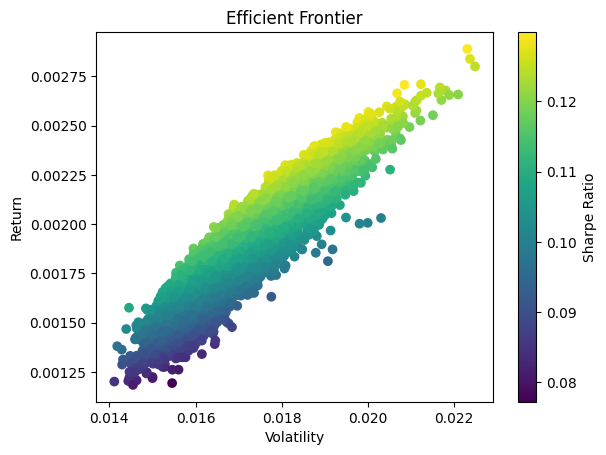

In [34]:
plt.scatter(results_df['volatility'], results_df['return'], c=results_df['return'] / results_df['volatility'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()